In [121]:
# The data-set aims to answer the following key questions:

    # Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
    # Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
    # How does Infant and Adult mortality rates affect life expectancy?
    # Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
    # What is the impact of schooling on the lifespan of humans?
    # Does Life Expectancy have positive or negative relationship with drinking alcohol?
    # Do densely populated countries tend to have lower life expectancy?
    # What is the impact of Immunization coverage on life Expectancy?


# Import Library

In [122]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import Data

In [123]:
p_profile = 'https://raw.githubusercontent.com/notfakearcher/yanjun/main/02_data/Life_Expectancy_Data.csv'


In [124]:
life = pd.read_csv(p_profile, header = 14)
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [125]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [126]:
# delete some rows which dont have any data in life expectancy
life = life.dropna(axis = 0, subset = ['Life expectancy '] )
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [127]:
life1 = life.copy()
life1 = life1.dropna()
life1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [128]:
cond = life1.columns != 'Life expectancy '
life2 = life1.loc[:,cond]
life2

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# every country mean life expectancy boxplot

In [129]:
y = life1['Life expectancy ']
cond1 = life2.columns != 'Country'
cond2 = life2.columns != 'Status'
life2 = life2.loc[:, cond1&cond2]

# Visual

In [135]:
cond1 = y < 65
X_temp = life2.loc[cond1,:]
y_temp = y[cond1]

In [136]:
df_temp = pd.concat([X_temp, y_temp], axis=1)
df_temp.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
5,2010,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,58.8


In [137]:
# mean values
df_temp_mean  = (
  df_temp.
  groupby("Life expectancy ").
  agg(np.mean)
).reset_index()
df_temp_mean

,Life expectancy,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,44.0,2002.000000,67.000000,46.000000,1.100000,3.885395,64.000000,92.000000,14.800000,75.000000,79.000000,4.820000,64.000000,24.700000,29.979898,1.213711e+06,7.700000,7.600000,0.388000,10.400000
1,44.3,2004.000000,723.000000,27.000000,4.360000,0.000000,68.000000,31.000000,27.100000,42.000000,67.000000,7.130000,65.000000,33.600000,454.366654,1.277751e+07,9.400000,9.400000,0.407000,9.200000
2,44.5,2004.000000,695.000000,15.500000,3.365000,28.951849,47.000000,499.000000,27.050000,23.500000,47.500000,6.410000,78.500000,35.750000,658.148733,7.291720e+06,9.550000,9.550000,0.427500,10.100000
3,44.6,2004.000000,665.000000,35.500000,2.610000,6.546362,74.500000,293.500000,21.350000,56.500000,77.000000,6.395000,76.000000,27.250000,235.459134,6.233060e+06,8.300000,8.250000,0.384000,9.800000
4,44.8,2003.000000,369.500000,15.000000,3.115000,33.956809,39.500000,167.500000,26.600000,23.500000,81.000000,6.745000,40.000000,37.200000,419.431467,1.029626e+06,5.450000,5.500000,0.433000,10.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,64.5,2006.666667,242.000000,22.000000,1.803333,44.484682,93.000000,362.666667,34.133333,29.333333,93.000000,3.170000,93.666667,0.266667,478.247114,1.887793e+07,6.233333,6.400000,0.373667,10.133333
150,64.6,2007.166667,250.666667,68.666667,4.608333,154.321436,84.833333,3455.833333,38.000000,85.333333,79.000000,5.721667,85.000000,0.850000,3011.808354,2.770349e+07,3.366667,6.466667,0.522667,11.516667
151,64.7,2005.428571,184.285714,15.857143,2.801429,59.224611,71.714286,2110.857143,29.757143,20.428571,73.428571,5.478571,60.285714,0.314286,1227.547496,9.974095e+06,6.100000,6.128571,0.506857,11.114286
152,64.8,2005.250000,182.500000,472.750000,3.187500,78.180652,58.000000,16407.000000,40.275000,621.000000,57.750000,3.642500,73.750000,0.200000,824.530672,2.912790e+08,8.125000,8.500000,0.444250,10.550000


In [138]:
X_temp = df_temp_mean[X_temp.columns]
y_temp = df_temp_mean["Life expectancy "]

In [140]:
a = X_temp["percentage expenditure"].to_numpy()
b = y_temp.to_numpy()

In [146]:
np.corrcoef(a,b)

array([[ 1.        , -0.02481852],
       [-0.02481852,  1.        ]])

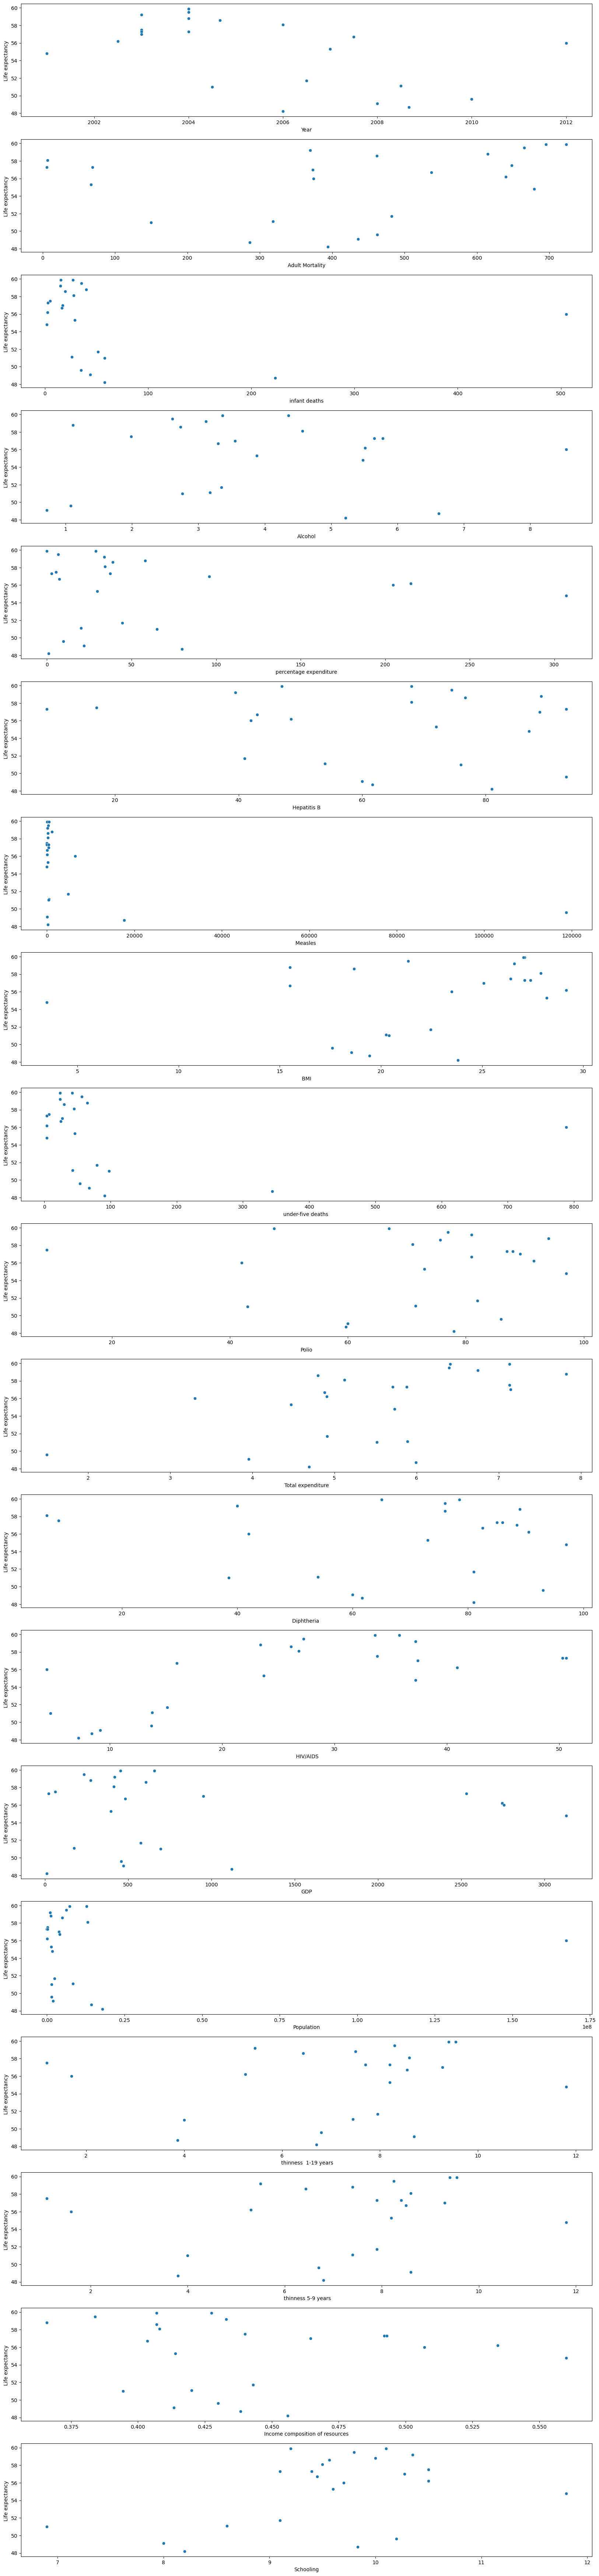

In [103]:
fig, ax = plt.subplots(19,1,figsize = (20,90))
ax = np.ravel(ax)



for i in range(len(life2.columns)):
  sns.scatterplot(x = X_temp.iloc[:,i], y = y_temp, ax = ax[i])
  # sns.scatterplot(x = life2.iloc[:, i], y = y, ax = ax[i])
plt.show()

# select features

In [11]:
life1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
life0 = life1.copy()
life0.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
life0.select_dtypes("object")

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [14]:
life0.select_dtypes("object").columns

Index(['Country', 'Status'], dtype='object')

In [15]:
# convert categorical variables to numerical labels
le = LabelEncoder()
cols_to_convert = life0.select_dtypes("object").columns
life0[cols_to_convert] = life0.select_dtypes("object").apply(le.fit_transform)
life0.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
# get X_cols and y_col
y_col = "Life expectancy "
cond1 = life1.columns != y_col
X_cols = life1.columns[cond1]
X_cols

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
# separate X and y parts of dataframe
X = life0[X_cols]
y = life0[y_col]

In [18]:
# initialize SelectkBest model
scoring_func = f_regression

# scoring_func = mutual_info_regression
myfit = SelectKBest(scoring_func, k = 21)
myfit

SelectKBest(k=21, score_func=<function f_regression at 0x00000147A6C0C7C0>)

In [19]:
# fit model
temp = myfit.fit_transform(X, y)

In [20]:
# random froest regression pick the features
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X, y)
rf_feature = list(zip(rf.feature_names_in_, rf.feature_importances_))
rf_features = pd.DataFrame(rf_feature, columns = ['feature','importance']).sort_values(by = 'importance', ascending = False)
rf_features


,feature,importance
19,Income composition of resources,0.565818
14,HIV/AIDS,0.224700
3,Adult Mortality,0.121607
17,thinness 1-19 years,0.015654
12,Total expenditure,0.009091
20,Schooling,0.008701
18,thinness 5-9 years,0.008341
5,Alcohol,0.006824
9,BMI,0.006080
1,Year,0.005955


In [21]:
# pick the top 10 features
num_f = 10
indice = np.argsort(rf.feature_importances_)[:: -1]
r_f = rf.feature_importances_
top_indice = indice[:num_f]
r_f[top_indice]
data = zip(X.columns[top_indice], r_f[top_indice])
data
data = pd.DataFrame(data, columns =['features', 'importance'])
data

,features,importance
0,Income composition of resources,0.565818
1,HIV/AIDS,0.224700
2,Adult Mortality,0.121607
3,thinness 1-19 years,0.015654
4,Total expenditure,0.009091
5,Schooling,0.008701
6,thinness 5-9 years,0.008341
7,Alcohol,0.006824
8,BMI,0.006080
9,Year,0.005955


In [22]:
# get feature importance
features = myfit.get_feature_names_out()
scores = myfit.scores_
feature_importance = pd.DataFrame({'features': features, 'scores': scores})
feature_importance = feature_importance.sort_values(by = 'scores', ascending = False)
feature_importance

,features,scores
20,Schooling,1853.125647
19,Income composition of resources,1783.964843
3,Adult Mortality,1604.975713
14,HIV/AIDS,889.749078
9,BMI,685.230506
17,thinness 1-19 years,436.796745
18,thinness 5-9 years,436.000902
2,Status,401.685050
15,GDP,398.365486
6,percentage expenditure,332.085410


In [23]:
# select top k features to include in model
k = 10
# feature_importance.iloc[:k,:]
X_col_selected = feature_importance.features[:k].values
X_col_selected

# X_col_selected

array(['Schooling', 'Income composition of resources', 'Adult Mortality',
       ' HIV/AIDS', ' BMI ', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Status', 'GDP', 'percentage expenditure'],
      dtype=object)

In [24]:
# apply information gain
ig = mutual_info_regression(life2, y)
# create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(life2.columns)):
  feature_scores[life2.columns[i]] = ig[i]
# sort in descending order accordig to their scores
sorted_features = sorted(feature_scores.items(), key =lambda x: x[1] , reverse = True)
# print the features by importance scores and the sorted features
for feature, score in sorted_features:
  print('Features:', feature, '|||||||Score:', score)


Features: Adult Mortality |||||||Score: 1.2688377439060612
Features: Income composition of resources |||||||Score: 0.9265119893793381
Features:  thinness  1-19 years |||||||Score: 0.8329624354243093
Features:  thinness 5-9 years |||||||Score: 0.823621898178303
Features: Schooling |||||||Score: 0.7076417722507844
Features:  BMI  |||||||Score: 0.6736464245924529
Features:  HIV/AIDS |||||||Score: 0.5034083521323569
Features: infant deaths |||||||Score: 0.44192361670502667
Features: Alcohol |||||||Score: 0.4417473373854146
Features: under-five deaths  |||||||Score: 0.43633692158894366
Features: GDP |||||||Score: 0.4081462637569646
Features: percentage expenditure |||||||Score: 0.3591408972502075
Features: Total expenditure |||||||Score: 0.33915616438732865
Features: Polio |||||||Score: 0.19491299719068023
Features: Diphtheria  |||||||Score: 0.1926601744927412
Features: Population |||||||Score: 0.17177524923502308
Features: Hepatitis B |||||||Score: 0.15992724641177514
Features: Measles  ||

In [25]:
sorted_features

[('Adult Mortality', 1.2688377439060612),
 ('Income composition of resources', 0.9265119893793381),
 (' thinness  1-19 years', 0.8329624354243093),
 (' thinness 5-9 years', 0.823621898178303),
 ('Schooling', 0.7076417722507844),
 (' BMI ', 0.6736464245924529),
 (' HIV/AIDS', 0.5034083521323569),
 ('infant deaths', 0.44192361670502667),
 ('Alcohol', 0.4417473373854146),
 ('under-five deaths ', 0.43633692158894366),
 ('GDP', 0.4081462637569646),
 ('percentage expenditure', 0.3591408972502075),
 ('Total expenditure', 0.33915616438732865),
 ('Polio', 0.19491299719068023),
 ('Diphtheria ', 0.1926601744927412),
 ('Population', 0.17177524923502308),
 ('Hepatitis B', 0.15992724641177514),
 ('Measles ', 0.1225350013565798),
 ('Year', 0.10127219346697736)]

In [26]:
sorted_features = pd.DataFrame(sorted_features)

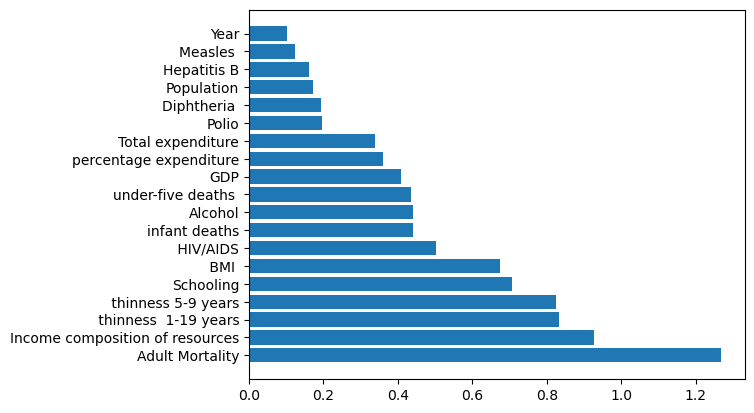

In [27]:
# plot a horizontal bar for all features scores
fig, ax = plt.subplots()
ax.barh(y = sorted_features[0], width = sorted_features[1])
plt.show()

# Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

In [28]:
life3 = life0[X_col_selected]
life3

,Schooling,Income composition of resources,Adult Mortality,HIV/AIDS,BMI,thinness 1-19 years,thinness 5-9 years,Status,GDP,percentage expenditure
0,10.1,0.479,263.0,0.1,19.1,17.2,17.3,1,584.259210,71.279624
1,10.0,0.476,271.0,0.1,18.6,17.5,17.5,1,612.696514,73.523582
2,9.9,0.470,268.0,0.1,18.1,17.7,17.7,1,631.744976,73.219243
3,9.8,0.463,272.0,0.1,17.6,17.9,18.0,1,669.959000,78.184215
4,9.5,0.454,275.0,0.1,17.2,18.2,18.2,1,63.537231,7.097109
...,...,...,...,...,...,...,...,...,...,...
2933,9.2,0.407,723.0,33.6,27.1,9.4,9.4,1,454.366654,0.000000
2934,9.5,0.418,715.0,36.7,26.7,9.8,9.9,1,453.351155,0.000000
2935,10.0,0.427,73.0,39.8,26.3,1.2,1.3,1,57.348340,0.000000
2936,9.8,0.427,686.0,42.1,25.9,1.6,1.7,1,548.587312,0.000000


In [104]:
#  find country which have lower life expectancy value(<65)
cond4 = life0['Life expectancy '] < 65
life4 = life3[cond4]
life4

,Schooling,Income composition of resources,Adult Mortality,HIV/AIDS,BMI,thinness 1-19 years,thinness 5-9 years,Status,GDP,percentage expenditure
1,10.0,0.476,271.0,0.1,18.6,17.5,17.5,1,612.696514,73.523582
2,9.9,0.470,268.0,0.1,18.1,17.7,17.7,1,631.744976,73.219243
3,9.8,0.463,272.0,0.1,17.6,17.9,18.0,1,669.959000,78.184215
4,9.5,0.454,275.0,0.1,17.2,18.2,18.2,1,63.537231,7.097109
5,9.2,0.448,279.0,0.1,16.7,18.4,18.4,1,553.328940,79.679367
...,...,...,...,...,...,...,...,...,...,...
2933,9.2,0.407,723.0,33.6,27.1,9.4,9.4,1,454.366654,0.000000
2934,9.5,0.418,715.0,36.7,26.7,9.8,9.9,1,453.351155,0.000000
2935,10.0,0.427,73.0,39.8,26.3,1.2,1.3,1,57.348340,0.000000
2936,9.8,0.427,686.0,42.1,25.9,1.6,1.7,1,548.587312,0.000000


In [105]:
X_train, X_test, y_train, y_test = train_test_split(life3, y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(life3, y)
model.coef_

array([ 9.24261672e-01,  9.80008537e+00, -1.92603977e-02, -4.49455829e-01,
        3.48085608e-02, -3.69868791e-02, -3.38097796e-02,  1.20506499e-01,
        1.14423565e-05,  3.58432050e-04])

# How does Infant and Adult mortality rates affect life expectancy?